# Advanced Data Visualization Tutorial: Bokeh

Data by itself can be very overwhelming at first, but thankfully Python has many various data visualization packages users can choose from. In this tutorial, I will be explaining advanced Data Visualization techniques using the Titanic data set and various Bokeh python packages. Hopefully at the end of this tutorial you learn something you can use in your own future projects. 

## Bokeh

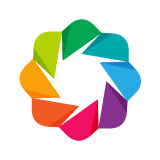

In [196]:
from IPython.display import Image 
Image("images/bokeh logo.png")

Source: https://bokeh.pydata.org/en/latest/

- A Python interactive library that focuses on modern web browsers for presentation
- **Goal**: Provide elegant, concise, and advanced custom graphics that are at the same time, highly interactive

Source: https://bokehplots.com/pages/about-bokeh.html

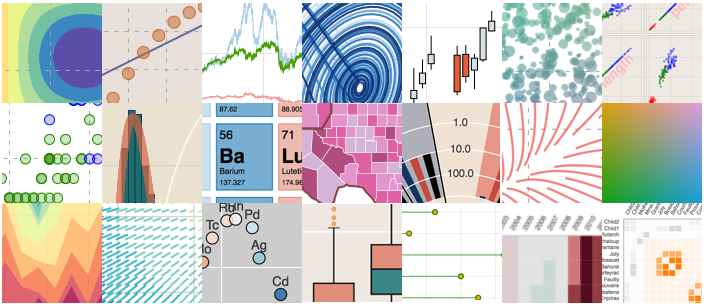

In [197]:
from IPython.display import Image 
Image("images/Bokeh_Introduction.png")

Source: https://www.analyticsvidhya.com/blog/2015/08/interactive-data-visualization-library-python-bokeh/

In [198]:
# first you must alwaysimport these primary python packages to work with Bokeh once downloaded
import pandas as pd
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [199]:
# import data 
## i will be using a dataset that is already cleaned, highly recommend checking your own dataset to make sure it is as well
df = pd.read_csv("data/ti_cleaned.csv")

In [200]:
# look at your data's labels and first five observations (make sure data is clean to make it much easier to manipulate)
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.00,1,0,7.2500,1
1,1,1,1,0,35.00,1,0,71.2833,2
2,2,1,3,1,26.00,0,0,7.9250,1
3,4,0,3,1,0.35,0,0,8.0500,1
4,5,0,3,1,28.00,0,0,8.4583,3


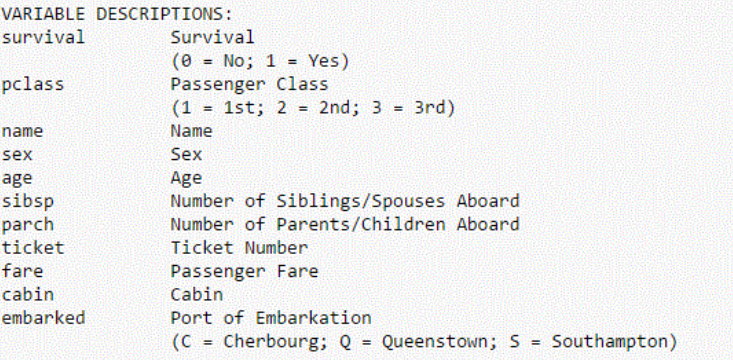

In [201]:
# picture below depicts what each variable stands for and what the values in each represent
from IPython.display import Image 
Image("images/Titanic_Variables.png")

## 1) Color Mapped Bar Chart

**The Color Mapped Bar Chart** is a great way to visually represent your data by bringing more color to your visual. Making each part pop out even more to your viewers.

Source: http://bokeh.pydata.org/en/latest/docs/gallery/bar_colormapped.html

In [202]:
# import Color Mapped Bar Chart Bokeh packages
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

In [203]:
# input data, I will be using the 3 different departure points on the x-axis of the chart
Embarked1 = ['Southampton', 'Queenstown', 'Cherbourg']

# the y-axis will consist of the total number of people who departed from each point
counts = [644, 77, 168]

# this line of code brings the data inputted earlier into one place that the program can recognize
source = ColumnDataSource(data=dict(Embarked1=Embarked1, counts=counts))

# the chart settings are below such as input of what data will be used, the title, and also if you want to show a legend as well
p = figure(x_range=Embarked1, plot_height=350, toolbar_location=None, title="Number of People Departing From Each Location")
p.vbar(x='Embarked1', top='counts', width=0.9, source=source, legend="Embarked1",
       line_color='white', fill_color=factor_cmap('Embarked1', palette=Spectral6, factors=Embarked1))

# more chart settings, primarily setting the range of the y-axis and you can also decide where to place the legend if chosen
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 700
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

# view result
show(p)

You can see that the location with the **most departures** is **Southampton** with a high gap difference when compared to the next largest departure point, Cherbourg.

## 2) Bar Stack

Brings another layer of data into your everyday bar charts if using data with various categories within itself already.

Source: http://bokeh.pydata.org/en/latest/docs/gallery/bar_stacked.html

In [204]:
# I found my data input by using groupby and focusing on gender and location
df.groupby(['Embarked', 'Sex']).count()

Unnamed: 0  Survived  Pclass  Age  SibSp  Parch  Fare
Embarked Sex                                                       
1        0           203       203     203  203    203    203   203
         1           442       442     442  442    442    442   442
2        0            73        73      73   73     73     73    73
         1            95        95      95   95     95     95    95
3        0            36        36      36   36     36     36    36
         1            41        41      41   41     41     41    41

In [205]:
# import Bar Stack Bokeh packages
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

In [206]:
# input data you want shown in chart
Embarked1 = ['Southampton', 'Queenstown', 'Cherbourg']
Sex1 = ["Male", "Female"]

# there are various colors of code that can be used. the first one used here is red and the second is a dark blue color
colors = ["#e84d60", "#718dbf"]

# this line is important in the way it is the "stacking" part of the code
data = {'Embarked1' : Embarked1,
        'Male'   : [442, 95, 41],
        'Female'   : [203, 73, 36]}

# brings your data together to one place
source = ColumnDataSource(data=data)

# here is the chart "settings". You can change the name of your title, axis values, and much more.
p = figure(x_range=Embarked1, plot_height=350, title="Gender Count from Each Departure Point",
           toolbar_location=None, tools="")

p.vbar_stack(Sex1, x='Embarked1', width=0.9, color=colors, source=source,
             legend=[value(x) for x in Sex1])

# similar to  the one seen on the last chart. Giving you the ability to play with different colors and where to locate the legend
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"

# view result
show(p)

This chart shows that there was not too much of a difference of men and women that departured from **Queenstown and Cherbourg**. The departure point of **Southampton** however, shows that a little more than half of those that departed were **men**.

## 3) Hover Inspections

This Bokeh package brings a higher level of interactivity to your data.

Source: http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/02%20-%20Styling%20and%20Theming.ipynb

In [207]:
# import Hover Inspections Bokeh packages
from bokeh.models.tools import HoverTool

In [208]:
# you input data here and turn into x and y variables. *3 = Southampton, 2 = Queenstown, 1 = Cherbourg
Embarked1 = [3, 2, 1]
x = Embarked1
counts = [644, 77, 168]
y = counts

# Basic plot setup. x_axis_type can = linear, log, or datetime depending on your need (linear is most common)
p = figure(width=600, height=300, x_axis_type="linear", title='Departures')

# these are your line settings. If you want to use a solide line instead, simply take out line_dash from code
p.line(x, y, line_dash="4 4", line_width=1, color='purple')

# these are your interactive circle settings. You can change their color and how intense you want them to light when hovered on
## by playing with the hover_alpha settings from 0.0 to 1
cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.7,
              line_color=None, hover_line_color="white")

# puts all your chart components together
p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

# view result and have fun highlighting data by hovering on it
show(p)

A more interactive chart that will be even more visually pleasing when using even more datapoints to hover on. Example shown below using Age and Fare from Titanic dataset

In [209]:
x = df.Age
y = df.Fare

p = figure(width=600, height=300, x_axis_type="linear", title='Departures')

p.line(x, y, line_dash="4 4", line_width=1, color='purple')

cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.7,
              line_color=None, hover_line_color="white")

p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

# view result and have fun highlighting data by hovering on it
show(p)

## 4) Rows and Columns

Bokeh allows you to customize your data to how you best want to visualize it. Using various different shapes and color customizations to choose from.

Source: http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/05%20-%20Presentation%20Layouts.ipynb

In [147]:
# import Rows and Columns Bokeh packages
from bokeh.layouts import row
from bokeh.layouts import column

In [148]:
# input data that you want shown on three different charts. Variables are already set up for you
x = df.Age
y0 = df.Fare
y1 = df.Embarked
y2 = df.Survived

# create a new plot
s1 = figure(width=250, plot_height=250)

# this is where the fun happens. Choosing your shape, size, and color
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# show the results in a row
show(row(s1, s2, s3))

# or a column
show(column(s1, s2, s3))

You choose how to visualize your data and Bokeh has the tools to really **make it your own**

## 5) Geographic Plots

Bokeh also allows you to plot data on a geographical level, bringing your data to real life settings for your viewers.

Source: http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/tutorial/09%20-%20Geographic%20Plots.ipynb

In [230]:
# import Geographic Plots Bokeh packages
from bokeh.plotting import figure
# WTMS is the most common web standard for tiled map data
from bokeh.tile_providers import WMTSTileSource

In [231]:
# web mercator coordinates (not ornidary longitude and latitude coordinates)
USA = x_range,y_range = ((-13884029,-7453304), (2698291,6455972))

# this gives you the option to zoom and manuever around the map with the two settings shown on the side you can select on/off
p = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range)
p.axis.visible = False

#  request a tile with the required zoom, x, and y values from a given tile provider
url = 'http://a.basemaps.cartocdn.com/dark_all/{Z}/{X}/{Y}.png'
attribution = "Tiles by Carto, under CC BY 3.0. Data by OSM, under ODbL"
p.add_tile(WMTSTileSource(url=url, attribution=attribution))

# view map and manuever around and can also zoom for more specific locations (make take time to load)
show(p)

In [232]:
# import python packages
import pandas as pd
import numpy as np

# this formulua helps convert longitude and latitude coordinates into web mercator coordinates (no need to mess with)
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

# this is where you can add a name of a location and add the longitude and latitude coordinates you desire
df = pd.DataFrame(dict(name=["Manhattan"], lon=[	-96.571671], lat=[	39.183609]))
wgs84_to_web_mercator(df)

,lat,lon,name,x,y
0,39.183609,-96.571671,Manhattan,-1.075031e+07,4.748006e+06


In [233]:
# you can choose shape, color, and size of specific point
p.circle(x=df['x'], y=df['y'], fill_color='purple', size=10)

# view result
show(p)

## Where in the World did the Titanic sink?

In [234]:
import pandas as pd
import numpy as np

def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df


df = pd.DataFrame(dict(name=["Titanic"], lon=[-49.948253], lat=[41.726931]))
df1 = pd.DataFrame(dict(name=["Southampton"], lon=[-1.404351], lat=[50.909698]))
df2 = pd.DataFrame(dict(name=["New York"], lon=[-73.935242], lat=[40.730610]))
wgs84_to_web_mercator(df)

,lat,lon,name,x,y
0,41.726931,-49.948253,Titanic,-5.560214e+06,5.120162e+06


In [235]:
p.circle(x=df['x'], y=df['y'], fill_color='red', size=10)

GlyphRenderer(id='e0eebe9f-6bd0-4ff0-b6b4-cf503bfec9ea', ...)

In [236]:
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = pd.DataFrame(dict(name=["Southampton"], lon=[-1.404351], lat=[50.909698]))
wgs84_to_web_mercator(df)

,lat,lon,name,x,y
0,50.909698,-1.404351,Southampton,-156331.638215,6.605336e+06


In [237]:
p.circle(x=df['x'], y=df['y'], fill_color='blue', size=10)

GlyphRenderer(id='5ee92dea-edc4-48d2-bf6b-82375244c1d4', ...)

In [238]:
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = pd.DataFrame(dict(name=["New York"], lon=[-73.935242], lat=[40.730610]))
wgs84_to_web_mercator(df)

,lat,lon,name,x,y
0,40.73061,-73.935242,New York,-8.230433e+06,4.972688e+06


In [239]:
p.circle(x=df['x'], y=df['y'], fill_color='yellow', size=10)

show(p)

The wreck of the ship was found in the location shown in **red**
The titanic began its voyage from Southampton, U.K (shown in **blue**) to New York City (shown in **yellow**)

## Minigame
The map is shown below, can you spot the 5 different locations **outside the U.S** I went to over the summer of 2017? 

*The locations for the minigame are shown as traingles.

In [242]:
import pandas as pd
import numpy as np

def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = pd.DataFrame(dict(name=["A", "B", "C", "D", "E"], lon=[-71.254028,-73.656830,-75.692482	 ,-57.6359100 , -54.585251 ], lat=[46.829853,45.516136,45.425533,-25.3006600,-25.516592]))
wgs84_to_web_mercator(df)

,lat,lon,name,x,y
0,46.829853,-71.254028,A,-7.931962e+06,5.914346e+06
1,45.516136,-73.656830,B,-8.199441e+06,5.703146e+06
2,45.425533,-75.692482,C,-8.426049e+06,5.688764e+06
3,-25.300660,-57.635910,D,-6.416000e+06,-2.912719e+06
4,-25.516592,-54.585251,E,-6.076402e+06,-2.939331e+06


In [243]:
p.triangle(x=df['x'], y=df['y'], fill_color='orange', size=10)
show(p)

In [244]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import CheckboxGroup
checkbox_group = CheckboxGroup(
        labels=["Montreal, Canada", "Trois-Rivieres, Canada",  "Barcelona, Spain", "Asuncion, Paraguay", 
                "Paris, France", "Ottawa, Canada", "Buenos Aires, Argentina", "Toronto, Canada", "Cuidad del Este, Paraguay",
               "Foz do Iguacu, Brazil", "Quebec, Canada ", "DisneyWorld"], active=[0, 1])

show(widgetbox(checkbox_group))

Only choose 5 locations. The 5 correct answers are given at the **end** of tutorial

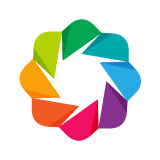

In [245]:
from IPython.display import Image 
Image("images/bokeh logo.png")

That is the end of my tutorial, but there is **still** so much out there for you to learn about Bokeh. If you want to learn more advanced techniques you can use, please **follow the link below**. There are many useful data visualization tutorials using Bokeh you can choose from.

https://bokeh.pydata.org/en/latest/docs/user_guide.html

# Answers to Minigame

Thanks for playing! Did you get them all correct?
- Montreal, Canada
- Ottawa, Canada
- Quebec, Canada
- Asuncion, Paraguay
- Foz do Iguacu, Brazil